In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Reading the csv file, del 2 columns from the file, checking first few rows of the file

In [3]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.drop(columns=['User ID','Gender',],axis=1,inplace=True)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
#Declare label as last column in the source file
y = dataset.iloc[:,-1].values

In [5]:
#Declaring X as all columns excluding last
X = dataset.iloc[:,:-1].values

In [6]:
A_train, A_test, b_train, b_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [7]:
# Sacaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [8]:
A_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [9]:
b_train.shape

(300,)

In [10]:
b_train

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], d

### Sigmoid activation

In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

In [11]:
def sigmoid(z):
    #print(z)
    return 1.0 / (1 + np.exp(-z))

### Making predictions

Let’s use the same multiple linear regression equation:

$$z = W_0 + W_1 * Age + W_2 * EstimatedSalary $$

After that we will transform the output using the sigmoid function to return a probability value between 0 and 1.

$$P(class=1) = \frac{1}{1 + e^{-z}}$$

In [12]:
def predict(features,weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    #print(features.shape)
    #print("weights: ", weights)
    z=np.dot(features,weights)
    #print(z)
    return sigmoid(z)

### Cost function

we use a cost function called Cross-Entropy, also known as Log Loss. Cross-entropy loss can be divided into two separate cost functions: one for y=1 and one for y=0.

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)}log(h_{\theta}(x^{(i)})) + (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$$

The benefits of taking the logarithm reveal themselves when you look at the cost function graphs for y=1 and y=0. These smooth monotonic functions (always increasing or always decreasing) make it easy to calculate the gradient and minimize cost. 

In [13]:
def cost_function(features,labels,weights):
    
    observations = len(labels)
    
    predictions=predict(features,weights)
    
    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

### Gradient descent

To minimize our cost, we use Gradient Descent.

The derivative of the sigmoid function:
$$s'(z)=s(z)(1−s(z))$$

Which leads to an equally beautiful and convenient cost function derivative:
$$C′=x(s(z)−y)$$

C′  is the derivative of cost with respect to weights\\

y is the actual class label (0 or 1)\\

s(z)  is your model’s prediction\\

x  is your feature or feature vector

The final step is assign class labels (0 or 1) to our predicted probabilities.

In [14]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

Convert probabilities to classes

In [15]:
def classify(predictions):
    '''
    input  - N element array of predictions between 0 and 1
    output - N element array of 0s (False) and 1s (True)
    '''
    decision_boundary_res = decision_boundary(predictions)
    decision_boundary_res = np.vectorize(decision_boundary_res)
    return decision_boundary_res.flatten()

In [16]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(200, 3)
    Labels: (200, 1)
    Weights:(3, 1)
    '''
    N = len(features)
    #print("features=",features.shape)
    #print("labels=",labels.shape)
    #print("weights=",weights.shape)
    #1 - Get Predictions
    predictions = predict(features, weights)
    #print(predictions)
    #predictions = classify(predictions)
    #predictions = np.amax(predictions, axis=1)
    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    #print(features.T)
    #print("predictions: ", predictions)
    #print("\n")
    #print(labels)
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

### Training

In [17]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        #print("weights: ", weights)
        #print("features: ", features)
        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print ("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

### Accuracy

In [18]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [19]:
import matplotlib.pyplot as plt

### Decision boundary

In [20]:
def plot_decision_boundary(trues, falses):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    no_of_preds = len(trues) + len(falses)

    ax.scatter([i for i in range(len(trues))], trues, s=25, c='b', marker="o", label='Trues')
    ax.scatter([i for i in range(len(falses))], falses, s=25, c='r', marker="s", label='Falses')

    plt.legend(loc='upper right');
    ax.set_title("Decision Boundary")
    ax.set_xlabel('N/2')
    ax.set_ylabel('Predicted Probability')
    plt.axhline(.5, color='black')
    plt.show()

In [24]:
weights, cost_history = train(A_train, b_train, (1,1), 1, 500)

iter: 0 cost: 0.45909900051475516


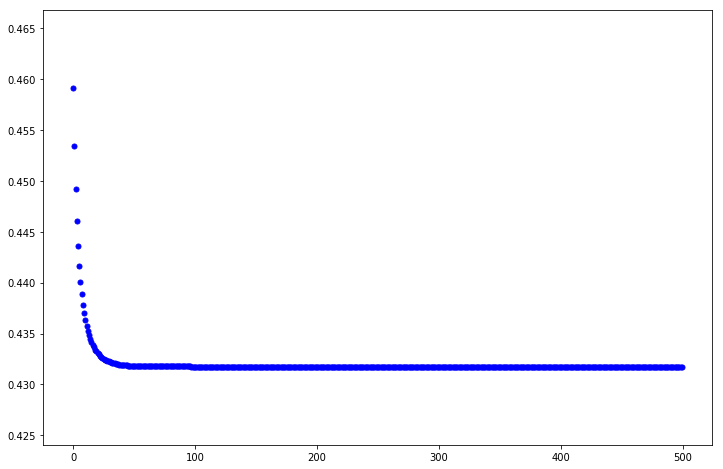

In [25]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.scatter([i for i in range(500)], cost_history, s=25, c='b', marker="o", label='Trues')
plt.show()